In [1]:
baselines_top1 = {'vgg16': (100-28.41), 'resnet50':100-23.85, 'resnet18': 100-30.24}
baselines_top5 = {'vgg16':100-9.62, 'resnet50':100-7.13, 'resnet18': 100-9.62}

baselines_top1, baselines_top5

({'vgg16': 71.59, 'resnet50': 76.15, 'resnet18': 69.76},
 {'vgg16': 90.38, 'resnet50': 92.87, 'resnet18': 90.38})

In [66]:
print(90.38 - 89.80,  71.59 - 70.47)

0.5799999999999983 1.1200000000000045


In [3]:
import pandas as pd
path = '/workspace/raid/data/jgusak/flops (2).csv'
# path = "/workspace/raid/data/jgusak/MUSC_exps - flops_finetune.csv"

import matplotlib.pylab as plt
import numpy as np

In [4]:
df = pd.read_csv(path, sep ='\t', index_col = False)
# df = pd.read_csv(path, index_col = False)

df.columns

Index(['model_name', 'model_type', 'wf', 'iter_number', 'block_number',
       'flops_conv', 'conv_frec', 'flops_fc', 'fc_frec', 'conv_speedup',
       'conv_compression', 'fc_speedup', 'fc_compression', 'prec_1_before',
       'prec_1_after', 'prec_5_before', 'prec_5_after', 'time',
       'layer_groups'],
      dtype='object')

# Visualize before ft accuracy

In [5]:
layer_groups_dict = {} 
for model_name in set(df['model_name']):
    gr = list(set(df[df['model_name'] == model_name]['layer_groups']))
    layer_groups_dict[model_name] = gr
    
layer_groups_dict

{'resnet50_conv_split': [0, 2],
 'vgg16_conv': [0, 2, 4, 7, 14],
 'resnet18_fc_split': [0, 2],
 'resnet18_conv_split': [0, 2],
 'vgg16_fc': [0, 2, 4, 7, 14],
 'resnet50_conv': [0, 2, 4, 7, 14],
 'resnet18_conv': [0, 2, 4, 7, 14],
 'resnet18_fc': [0, 2, 4, 7, 14]}

In [185]:
vgg16_layer_idxs = {0 : [],
              2: [12], 
              4: [4, 8, 12],
              7: [2, 4, 6, 8, 10, 12], 
              14: list(np.arange(13))}

In [6]:
y = df[df['model_name']==model_name][
    df['wf']==0.8][
    df['layer_groups']==7][
    df['model_type']=='compress'][
    df['iter_number'] == 3]
y.shape

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


(7, 19)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


hop 14 dict_keys([14, 7, 4, 2])
hop 7 dict_keys([14, 7, 4, 2])
hop 4 dict_keys([14, 7, 4, 2])
hop 2 dict_keys([14, 7, 4, 2])


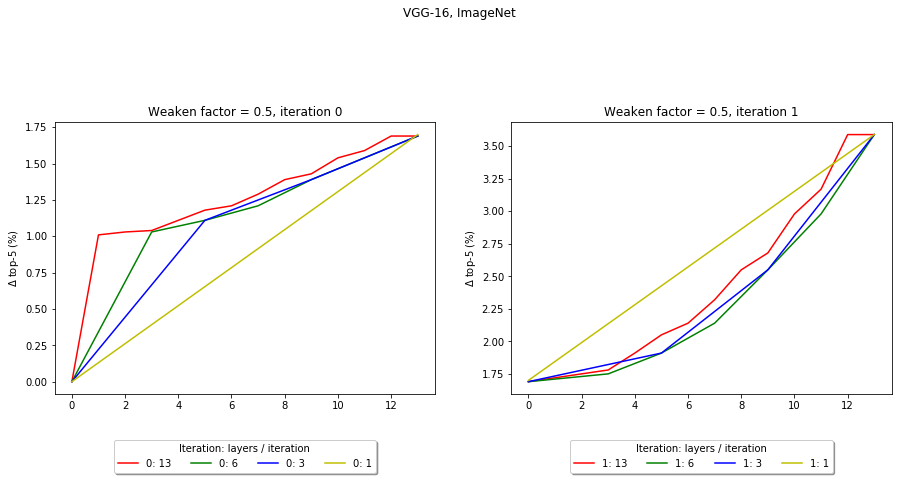

hop 14 dict_keys([14, 7, 4, 2])
hop 7 dict_keys([14, 7, 4, 2])
hop 4 dict_keys([14, 7, 4, 2])
hop 2 dict_keys([14, 7, 4, 2])


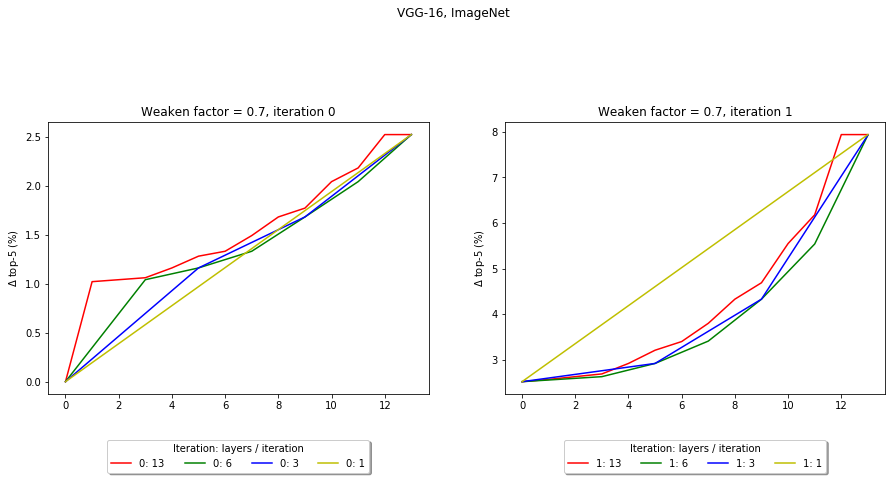

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


hop 14 dict_keys([14, 7, 4, 2])
hop 7 dict_keys([14, 7, 4, 2])
hop 4 dict_keys([14, 7, 4, 2])
hop 2 dict_keys([14, 7, 4, 2])


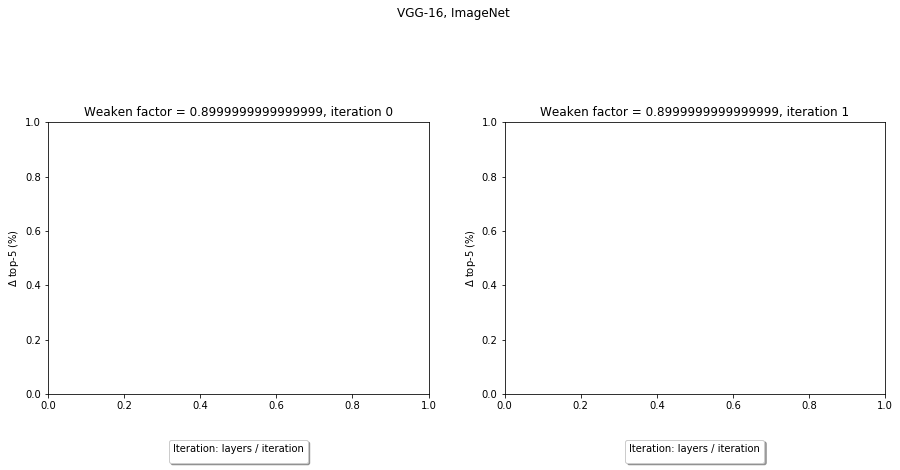

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


hop 14 dict_keys([14, 7, 4, 2])
hop 7 dict_keys([14, 7, 4, 2])
hop 4 dict_keys([14, 7, 4, 2])
hop 2 dict_keys([14, 7, 4, 2])


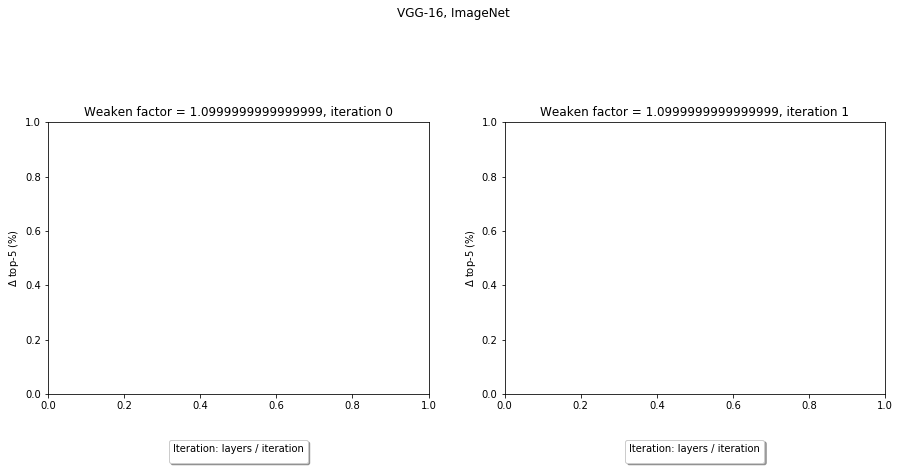

In [31]:
model_name = 'vgg16_conv'
plot_cols = ['conv_speedup', 'prec_5_before', 'prec_5_after']
plot_col = plot_cols[0]

for wf in np.arange(0.5, 1.1, 0.2)[:]:
    n_iter = 2
    fig, axs = plt.subplots(1 , n_iter, figsize = (15,5))
    
    y_prevs = {}

    for iter_number in range(n_iter):

        colors = ['r', 'g', 'b', 'y']
        for layer_groups, col in zip(layer_groups_dict[model_name][::-1], colors):

            y = df[df['model_name']==model_name][
                df['wf']==wf][
                df['layer_groups']==layer_groups][
                df['model_type']=='compress'][
                df['iter_number'] == iter_number]

            
            y = y[plot_col].values
            
    
            y = np.concatenate([y[:-2], y[-1:]])


            if plot_col.startswith('prec_5'):
                mname = model_name.split('_')[0]
                top5 = baselines_top5[mname]

                y = (y - top5)

            layer_idxs = vgg16_layer_idxs
            x = [0] + list(np.array(layer_idxs[layer_groups])+1)

            if iter_number == 0:
                y = np.concatenate([[0], y])
            else:
                print('hop', layer_groups, y_prevs.keys())
                y = np.concatenate([y_prevs[layer_groups], y])
                
            y_prevs[layer_groups] = [y[-1]]
              
            

            try:
                axs[iter_number].plot(x, y, '-', label = '{}: {}'.format(iter_number, layer_groups-1),
                                      color = col)
            except:
                pass
            
            
            axs[iter_number].legend(loc = 'upper center', title = 'Iteration: layers / iteration',
                                    bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4)
            axs[iter_number].set_title('Weaken factor = {}, iteration {}'.format(wf, iter_number))
            axs[iter_number].set_ylabel('$\Delta$ top-5 (%)')


    fig.suptitle('VGG-16, ImageNet', y = 1.2)
    plt.show()


In [168]:
df.columns

Index(['model_name', 'model_type', 'wf', 'iter_number', 'block_number',
       'flops_conv', 'conv_frec', 'flops_fc', 'fc_frec', 'conv_speedup',
       'conv_compression', 'fc_speedup', 'fc_compression', 'prec_1_before',
       'prec_1_after', 'prec_5_before', 'prec_5_after', 'time', 'gpu_time',
       'layer_groups'],
      dtype='object')

In [60]:
name = 'resnet50_conv_split'
i = 1
l = 2
cols = ['iter_number', 'conv_speedup', 'wf', 'prec_1_before', 'prec_1_after','prec_5_before', 'prec_5_after', 'layer_groups']
dff = df[df['model_name']==name][df['wf']==0.5][df['layer_groups']==l][df['iter_number'] <=i][df['conv_speedup']>0][df['conv_speedup']>0][cols].sort_values(by = ['conv_speedup'])
dff2 = df[df['model_name']==name][df['wf']==0.6][df['layer_groups']==l][df['iter_number'] <=i][df['conv_speedup']>0][df['conv_speedup']>0][cols].sort_values(by = ['conv_speedup'])
dff3 = df[df['model_name']==name][df['wf']==0.7][df['layer_groups']==l][df['iter_number'] <=i][df['conv_speedup']>0][df['conv_speedup']>0][cols].sort_values(by = ['conv_speedup'])
dff4 = df[df['model_name']==name][df['wf']==0.8][df['layer_groups']==l][df['iter_number'] <=i][df['conv_speedup']>0][df['conv_speedup']>0][cols].sort_values(by = ['conv_speedup'])
dff5 = df[df['model_name']==name][df['wf']==0.9][df['layer_groups']==l][df['iter_number'] <=i][df['conv_speedup']>0][df['conv_speedup']>0][cols].sort_values(by = ['conv_speedup'])
dff6 = df[df['model_name']==name][df['wf']==1.0][df['layer_groups']==l][df['iter_number'] <=i][df['conv_speedup']>0][df['conv_speedup']>0][cols].sort_values(by = ['conv_speedup'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [61]:
import seaborn as sns

In [62]:
set(df['model_name'])

{'resnet18_conv',
 'resnet18_conv_split',
 'resnet18_fc',
 'resnet18_fc_split',
 'resnet50_conv',
 'resnet50_conv_split',
 'vgg16_conv',
 'vgg16_fc'}

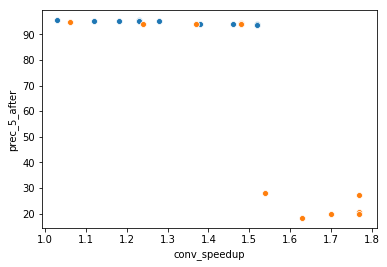

In [63]:
K = -4
# sns.scatterplot(x = 'conv_speedup', y = 'prec_5_after', data = dff[:])
sns.scatterplot(x = 'conv_speedup', y = 'prec_5_after', data = dff2[:])
# sns.scatterplot(x = 'conv_speedup', y = 'prec_5_after', data = dff3[:])
# sns.scatterplot(x = 'conv_speedup', y = 'prec_5_after', data = dff4[:])
# sns.scatterplot(x = 'conv_speedup', y = 'prec_5_after', data = dff5[:K])
sns.scatterplot(x = 'conv_speedup', y = 'prec_5_after', data = dff6[:])

In [33]:
dff.shape

(0, 8)

In [83]:
print(90.38-87.97)
cols = ['model_name', 'wf', 'iter_number', 'block_number', 'conv_speedup', 'conv_compression', 'fc_speedup', 'prec_5_before', 'prec_5_after', 'time', 'layer_groups']

df[df['model_name'] == 'vgg16_conv'][df['wf']==1][df['conv_speedup']>=2.9][df['conv_speedup']<=4][cols]

2.4099999999999966


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,model_name,wf,iter_number,block_number,conv_speedup,conv_compression,fc_speedup,prec_5_before,prec_5_after,time,layer_groups
3153,vgg16_conv,1.0,0,9,3.18,3.12,1.0,80.38,86.66,0.000666,14
3154,vgg16_conv,1.0,0,10,3.71,3.63,1.0,84.28,87.97,0.000705,14
3206,vgg16_conv,1.0,0,4,3.18,3.13,1.0,79.75,87.22,0.000662,7


In [91]:
print(90.38-88.72)
print(92.87-93.22, 76.15-76.59)
print(89.08-89.47, 69.76-69.62)

cols = ['model_name', 'wf', 'iter_number', 'block_number', 'conv_speedup', 'conv_compression', 'fc_speedup', 'prec_5_before', 'prec_5_after', 'time', 'layer_groups']

df[df['model_name'] == 'resnet50_conv'][df['conv_speedup']>=1.7][df['conv_speedup']<=20][df['prec_5_after']>0][df['layer_groups']==2][cols]

1.6599999999999966
-0.3499999999999943 -0.4399999999999977
-0.39000000000000057 0.14000000000000057


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,model_name,wf,iter_number,block_number,conv_speedup,conv_compression,fc_speedup,prec_5_before,prec_5_after,time,layer_groups
1285,resnet50_conv,0.5,3,0,1.70,1.70,1.0,6.53,82.12,0.001485,2
1286,resnet50_conv,0.5,3,1,1.70,1.70,1.0,82.12,83.47,0.000915,2
1391,resnet50_conv,0.7,2,0,1.74,1.74,1.0,0.28,55.12,0.001767,2
1392,resnet50_conv,0.7,2,1,1.74,1.74,1.0,55.12,64.56,0.002208,2
1393,resnet50_conv,0.7,3,0,1.76,1.76,1.0,0.81,49.28,0.001732,2
1394,resnet50_conv,0.7,3,1,1.76,1.76,1.0,49.28,56.78,0.001773,2
1501,resnet50_conv,0.6,3,0,1.75,1.74,1.0,8.41,60.84,0.001013,2
1502,resnet50_conv,0.6,3,1,1.75,1.74,1.0,60.84,68.41,0.001008,2
1607,resnet50_conv,0.8,2,0,1.77,1.77,1.0,0.75,30.06,0.001073,2
1608,resnet50_conv,0.8,2,1,1.77,1.77,1.0,30.06,39.34,0.001085,2


In [60]:
set(df['model_name'])

{'resnet18_conv',
 'resnet18_conv_split',
 'resnet18_fc',
 'resnet18_fc_split',
 'resnet50_conv',
 'resnet50_conv_split',
 'vgg16_conv',
 'vgg16_fc'}

In [60]:
print(91.91-90.38)
cols = ['model_name', 'wf', 'iter_number', 'block_number', 'conv_speedup', 'conv_compression', 'fc_speedup', 'prec_1_before', 'prec_1_after', 'prec_5_before', 'prec_5_after', 'time', 'layer_groups']

df[df['model_name'] == 'vgg16_conv'][df['conv_speedup']>=2.8][df['conv_speedup']<=4][df['prec_5_after']>91][cols]

1.5300000000000011


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,model_name,wf,iter_number,block_number,conv_speedup,conv_compression,fc_speedup,prec_1_before,prec_1_after,prec_5_before,prec_5_after,time,layer_groups
2742,vgg16_conv,0.5,1,13,3.59,3.51,1.0,71.41,71.41,90.25,91.03,0.000511,14
2792,vgg16_conv,0.5,1,6,3.59,3.51,1.0,69.69,72.16,89.62,91.16,0.000762,7
3051,vgg16_conv,0.8,0,12,3.16,3.10,1.0,70.97,72.66,90.25,91.94,0.000503,14


In [62]:
print(91.16-90.38, 72.16 - 71.59)
df[df['model_name'] == 'vgg16_conv'][df['conv_speedup']>3.8][df['conv_speedup']<=5][df['prec_5_after']>90][cols]

0.7800000000000011 0.5699999999999932


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,model_name,wf,iter_number,block_number,conv_speedup,conv_compression,fc_speedup,prec_1_before,prec_1_after,prec_5_before,prec_5_after,time,layer_groups
2954,vgg16_conv,0.6,1,9,4.02,3.93,1.0,62.03,67.03,86.34,90.09,0.000815,14
3248,vgg16_conv,0.9,0,11,4.12,4.02,1.0,67.69,70.16,87.97,90.94,0.000487,14


In [65]:
71.59 - 70.16, 90.38 - 87.97

(1.4300000000000068, 2.4099999999999966)

In [265]:
cols = ['model_name', 'wf', 'iter_number', 'block_number', 'conv_speedup', 'fc_speedup', 'prec_1_before', 'prec_1_after', 'prec_5_before', 'prec_5_after', 'time', 'layer_groups']
df[df['model_name'] == 'vgg16_conv'][df['wf'] == 0.6][df['iter_number'] >=0][df['block_number']>=0][df['prec_5_before']>=88][df['prec_5_after']>0][df['conv_speedup'] >= 5][cols]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,model_name,wf,iter_number,block_number,conv_speedup,fc_speedup,prec_1_before,prec_1_after,prec_5_before,prec_5_after,time,layer_groups
2957,vgg16_conv,0.6,1,12,5.16,1.0,67.34,67.41,88.38,88.09,0.000838,14
2958,vgg16_conv,0.6,1,13,5.16,1.0,67.41,67.75,88.09,88.59,0.000851,14
3007,vgg16_conv,0.6,1,5,5.16,1.0,65.84,65.75,88.19,87.62,0.000716,7
3030,vgg16_conv,0.6,1,3,5.16,1.0,66.28,67.00,88.28,88.72,0.000492,4


In [6]:
df

,model_name,model_type,wf,iter_number,block_number,flops_conv,conv_frec,flops_fc,fc_frec,conv_speedup,conv_compression,fc_speedup,fc_compression,prec_1_before,prec_1_after,prec_5_before,prec_5_after,time,layer_groups
0,resnet18_fc,init,0.0,0,0,1.813561e+09,1.00,512000.0,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.000276,0
1,resnet18_fc,compress,0.5,0,0,1.789372e+09,1.00,512000.0,0.00,1.01,1.01,1.00,1.01,75.81,75.34,92.38,91.84,0.000332,14
2,resnet18_fc,compress,0.5,0,1,1.789372e+09,1.00,512000.0,0.00,1.01,1.01,1.00,1.01,75.34,75.62,91.84,91.81,0.000342,14
3,resnet18_fc,compress,0.5,0,2,1.789372e+09,1.00,512000.0,0.00,1.01,1.01,1.00,1.01,75.62,75.91,91.81,92.22,0.000344,14
4,resnet18_fc,compress,0.5,0,3,1.730572e+09,1.00,512000.0,0.00,1.05,1.05,1.00,1.05,74.84,75.56,92.19,92.41,0.000561,14
5,resnet18_fc,compress,0.5,0,4,1.730572e+09,1.00,512000.0,0.00,1.05,1.05,1.00,1.05,75.56,75.53,92.41,91.81,0.000543,14
6,resnet18_fc,compress,0.5,0,5,1.674830e+09,1.00,512000.0,0.00,1.08,1.08,1.00,1.08,74.38,74.88,91.19,91.47,0.000577,14
7,resnet18_fc,compress,0.5,0,6,1.674830e+09,1.00,512000.0,0.00,1.08,1.08,1.00,1.08,74.88,75.38,91.47,91.31,0.000562,14
8,resnet18_fc,compress,0.5,0,7,1.625514e+09,1.00,512000.0,0.00,1.12,1.12,1.00,1.12,74.06,75.22,91.16,91.22,0.000595,14
9,resnet18_fc,compress,0.5,0,8,1.566540e+09,1.00,512000.0,0.00,1.16,1.16,1.00,1.16,73.72,75.78,90.44,91.53,0.000634,14
